In [1]:
# imports and froms
import _config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import wikipedia as wp

# declare variables
us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
state_list = []

# Collecting Data

In [2]:
# collecting population data by state
# enter the h1 element from the article in wp.page(h1)
html_population = wp.page("List of states and territories of the United States by population").html().encode("UTF-8")
html_unemployment = wp.page("List of U.S. states and territories by unemployment rate").html().encode("UTF-8")
html_medianincome = wp.page("List of United States counties by per capita income").html().encode("UTF-8")

# determine the index of your table
df_population = pd.read_html(html_population)[0]
df_unemployment = pd.read_html(html_unemployment)[0]
df_medianincome = pd.read_html(html_medianincome)[1]

# remove unneeded rows and columns
df_population_drop = df_population.drop(df_population.index[52:69])
df_population_drop = df_population_drop.drop([29]) 
df_population_drop = df_population_drop.drop(columns = ['Rank in the fifty states, 2018', 'Rank in States & Territories', 'Percent increase from 2010-2018[note 1]', 'Total seats in the U.S. House of Representatives, 2013â2023', 'Estimated population per electoral vote, 2018[note 2]', 'Estimated population per House seat, 2018', 'Census population per House seat, 2010', 'Percent of the total U.S. population, 2018[note 3]'])
df_unemployment_drop = df_unemployment.drop([0, 1, 2, 3, 21])
df_unemployment_drop = df_unemployment_drop.drop(columns = ['Rank', 'Rank(50 states)', 'Monthly change (%) (=drop in unemployment)'])
df_medianincome_drop = df_medianincome.dropna(subset = ['Rank', 'County-equivalent'])

# create two dataframes to store state and county, and median income
df_medianincome_trim =[]
df_medianincome_trim = df_medianincome_drop[['State', 'County-equivalent']]
df_medianincome_trim = df_medianincome_trim.rename(index=str, columns={'State':'State', 'County-equivalent':'County'})

df_medianincome_trim2 = []
df_medianincome_trim2 = df_medianincome_drop[['Medianfamilyincome']]
df_medianincome_trim2 = df_medianincome_trim2.rename(index=str, columns={'Medianfamilyincome':'MedianIncome'})

# convert string to numeric
df_population_convert1 = df_population_drop['Population estimate, July 1, 2018[4]'].apply(lambda x: x).astype(int)
df_population_convert2 = df_population_drop['Census population, April 1, 2010'].apply(lambda x: x).astype(int)
df_unemployment_convert = df_unemployment_drop['Unemployment rate (seasonally adjusted)'].apply(lambda x: x.split('%')[0].strip()).astype(float)
df_medianincome_trim2 = df_medianincome_trim2[df_medianincome_trim2.columns[0]].replace('[\$,]', '', regex=True).astype(float)

# combine lists
df_population_combine = pd.DataFrame(zip(df_population_drop['Name'], df_population_convert1, df_population_convert2))
df_unemployment_combine = pd.DataFrame(zip(df_unemployment_drop['Statefederal district or territory'], df_unemployment_convert))
df_medianincome_trim['MedianIncome'] = df_medianincome_trim2

# rename columns
df_population_rename = df_population_combine.rename(columns = {0: 'State', 1: 'Population Estimate 2018', 2:'Population Census 2010'})
df_unemployment_rename = df_unemployment_combine.rename(columns = {0: 'State', 1: 'Unemployment'})

# Graphing Data

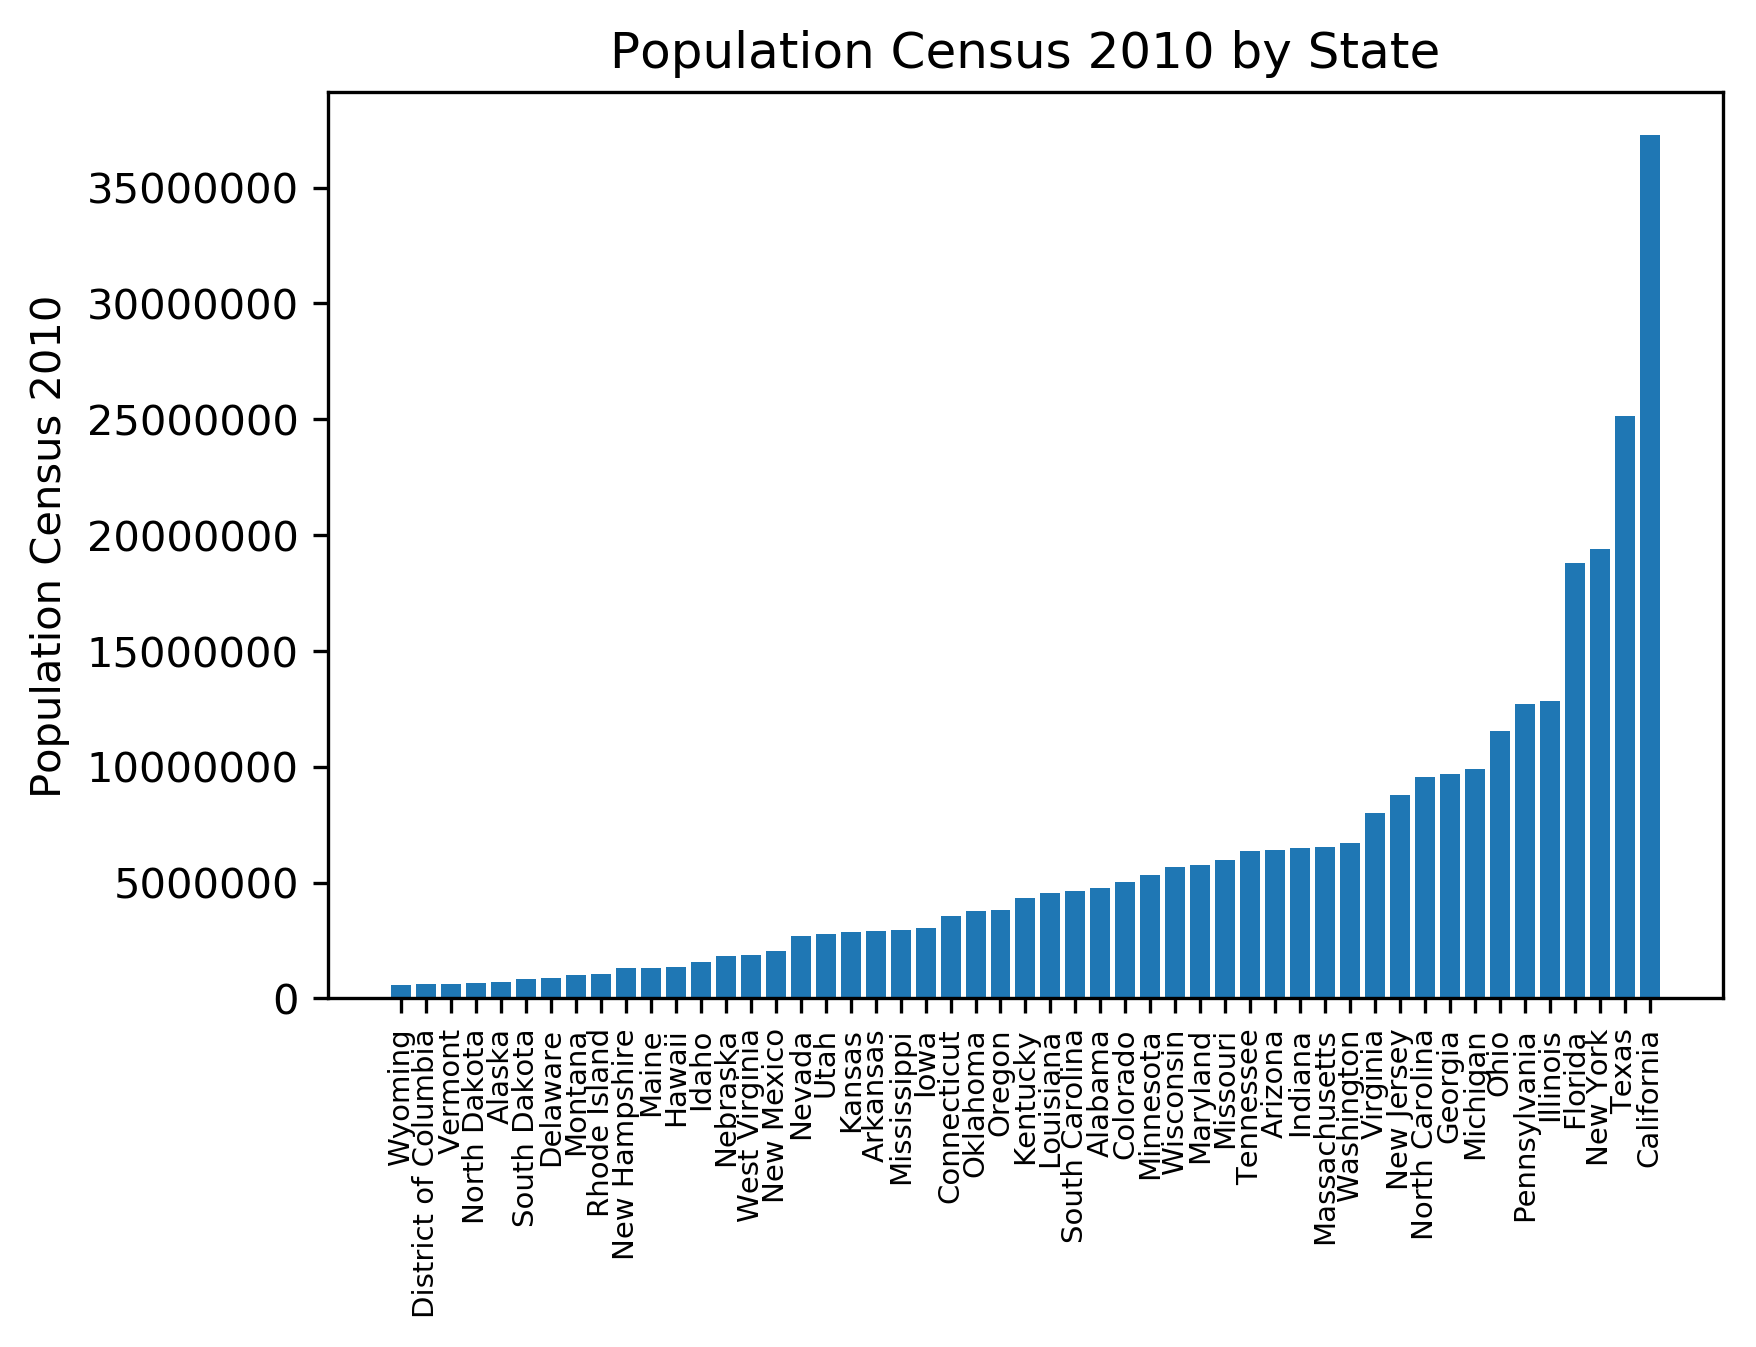

In [3]:
# sort by state and save a csv
df_population_sort_state = df_population_rename.sort_values(['Population Census 2010'])
df_population2 = df_population_sort_state
df_population2.to_csv('states_by_population_census.csv', header=1, index=False)

# plot the data
plt.figure(dpi=300)
plt.xticks(fontsize=7, rotation=90)
plt.ticklabel_format(style = 'plain')
plt.bar(df_population2['State'], df_population2['Population Census 2010'])
plt.title('Population Census 2010 by State')
plt.ylabel('Population Census 2010')
plt.savefig('population_census_state.png')
plt.show()

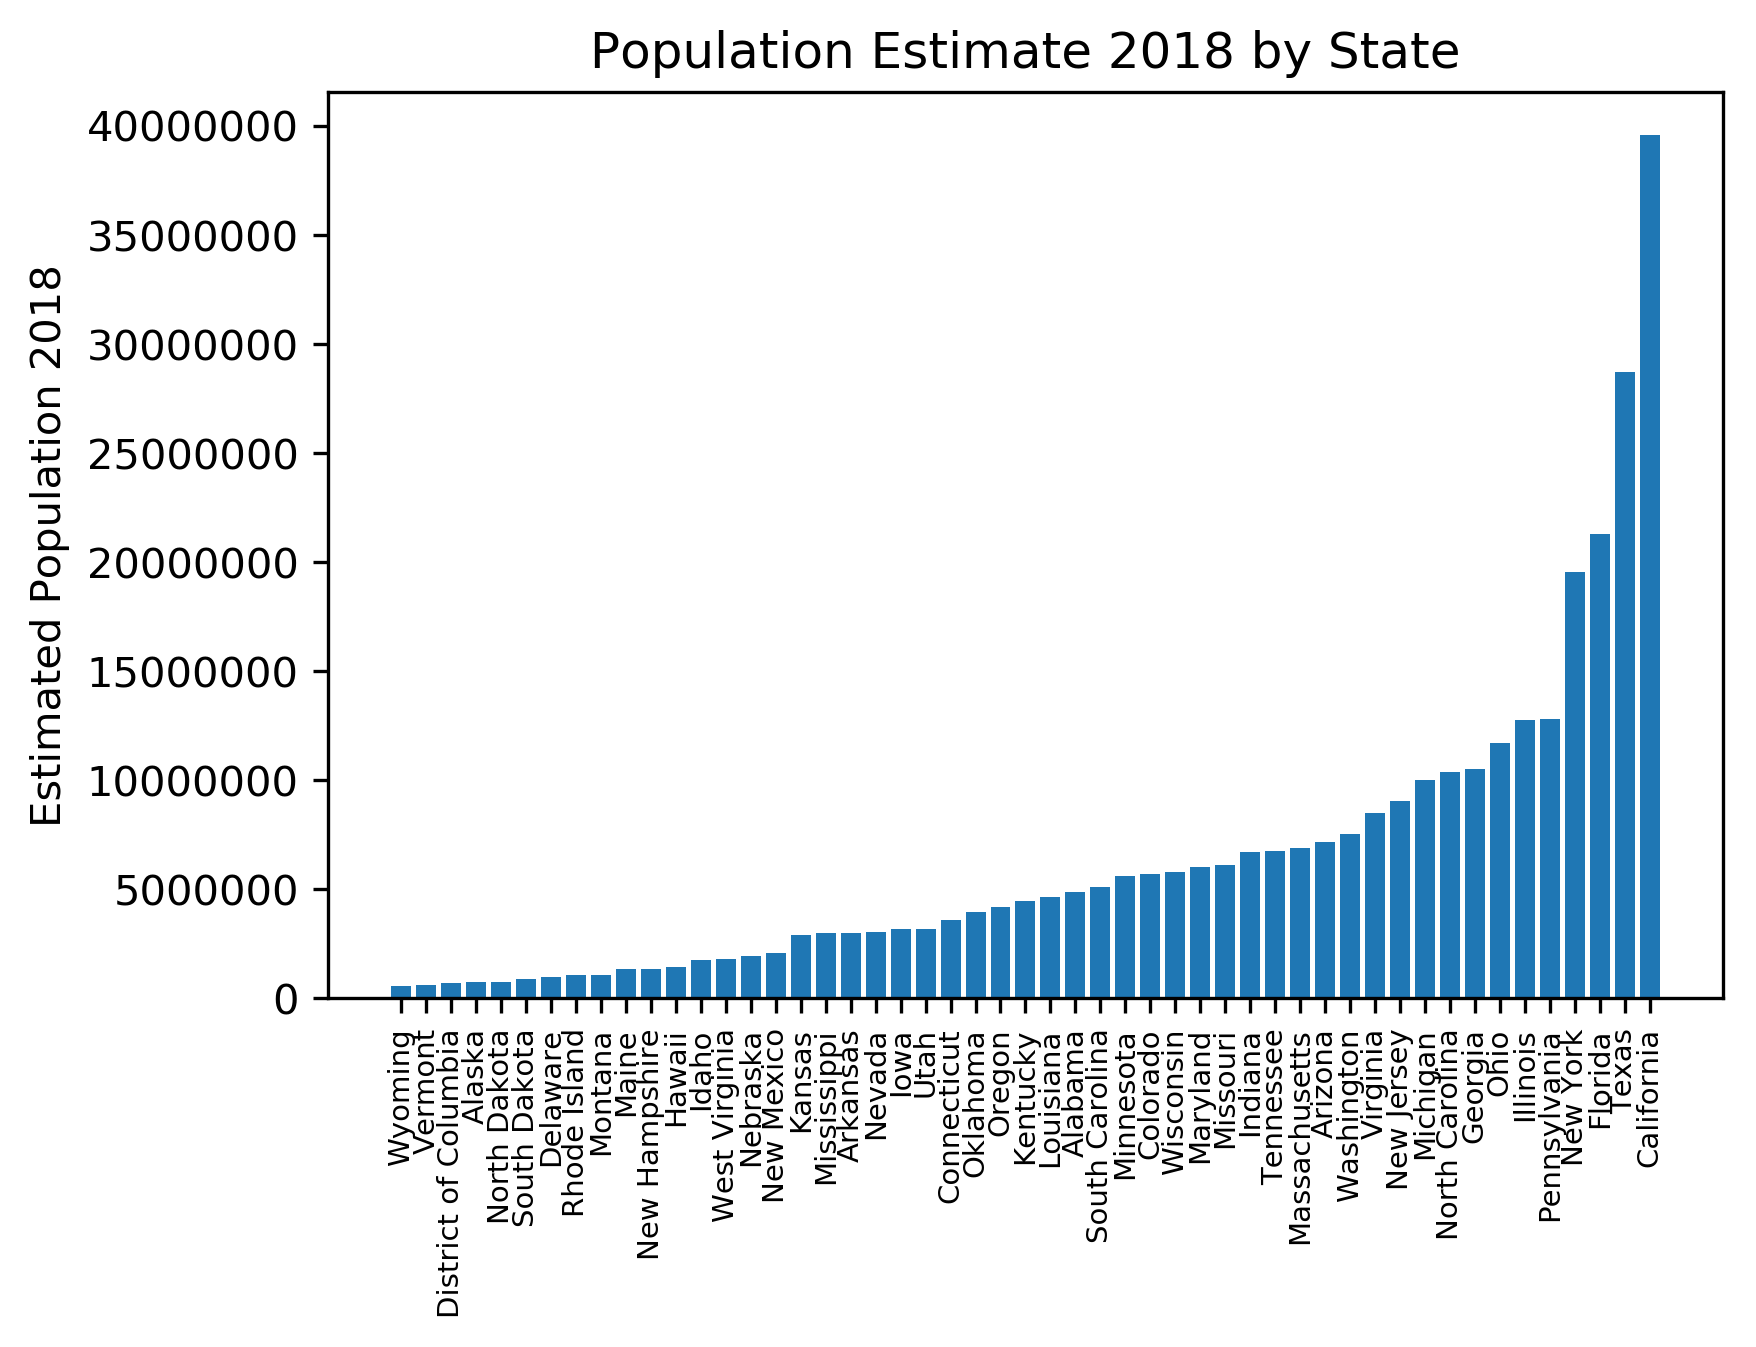

In [4]:
# sort by state and save a csv
df_population_sort_state = df_population_rename.sort_values(['Population Estimate 2018'])
df_population2 = df_population_sort_state
df_population2.to_csv('states_by_population_estimate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=300)
plt.xticks(fontsize=7, rotation=90)
plt.ticklabel_format(style = 'plain')
plt.bar(df_population2['State'], df_population2['Population Estimate 2018'])
plt.title('Population Estimate 2018 by State')
plt.ylabel('Estimated Population 2018')
plt.savefig('population_estimate_state.png', bbox_inches = 'tight')
plt.show()

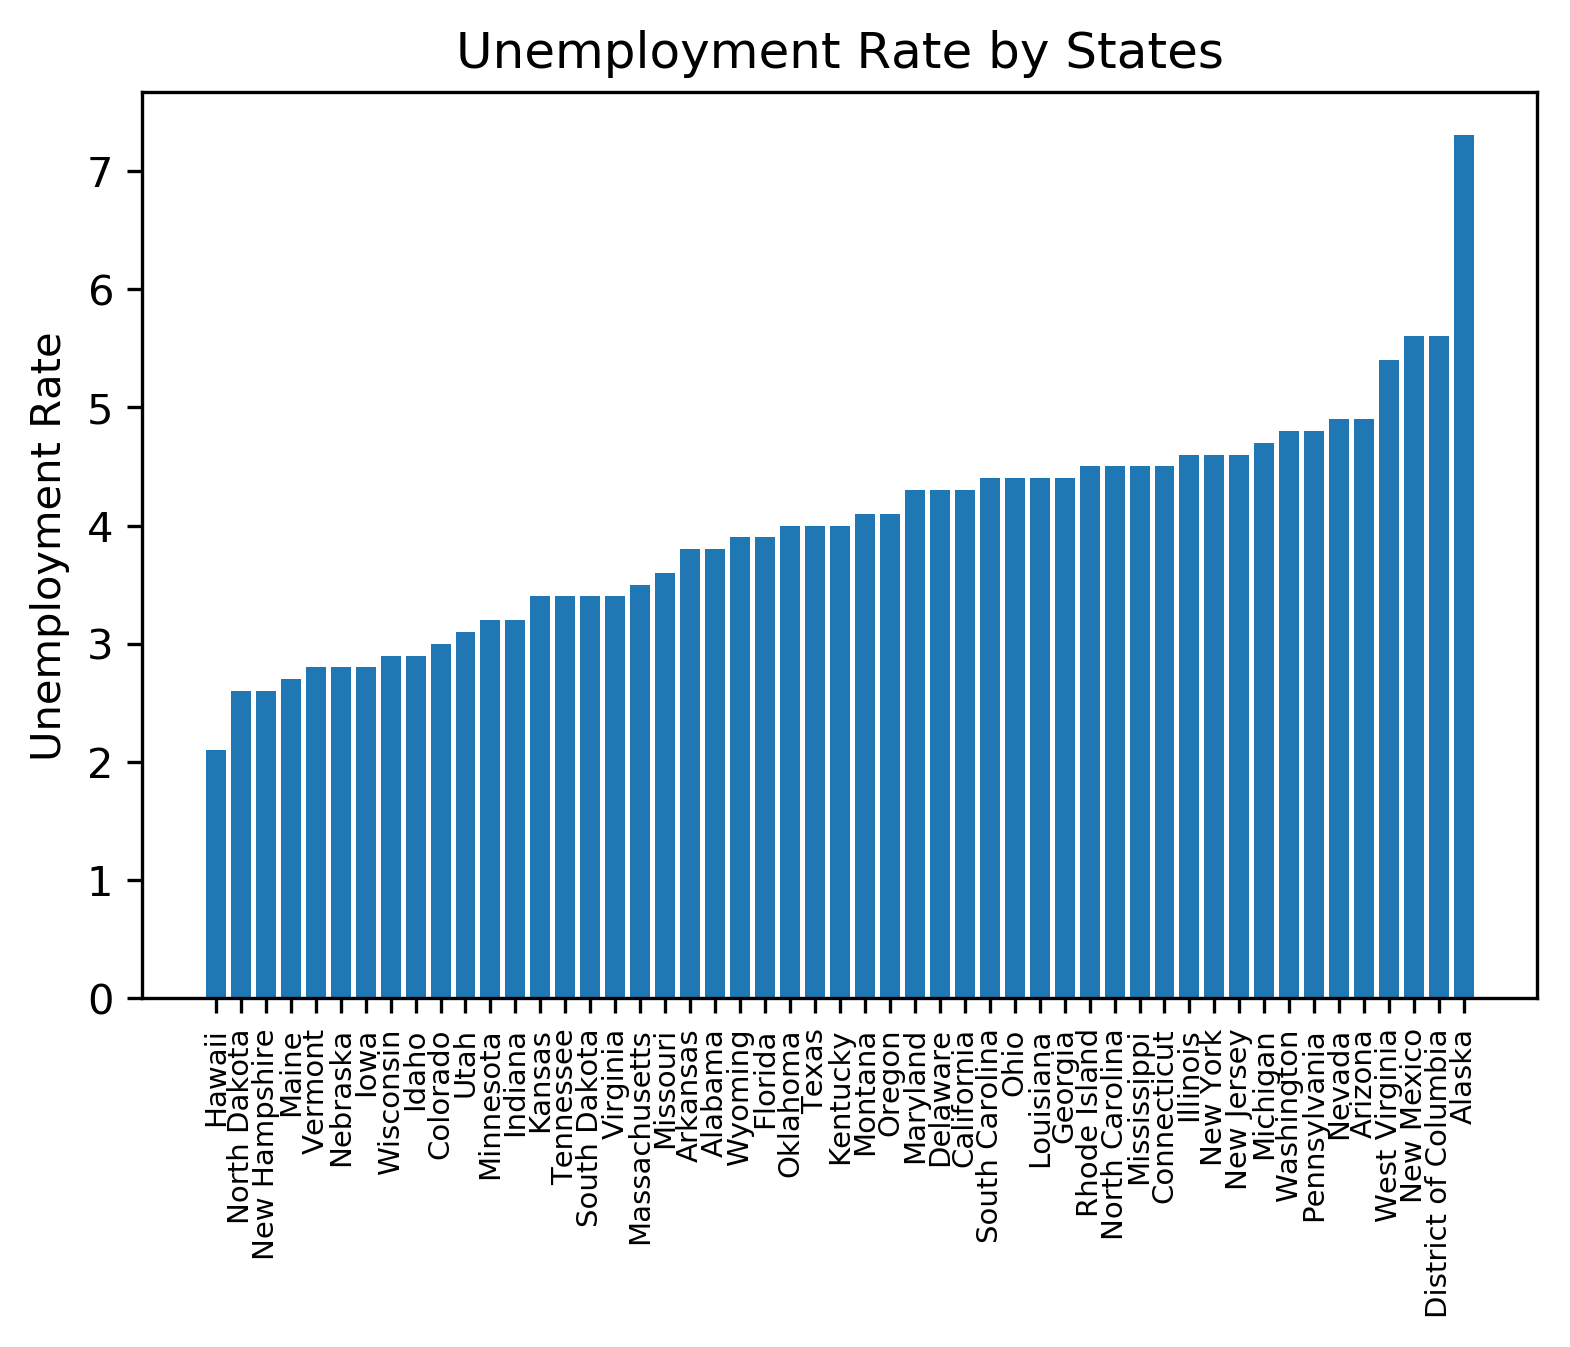

In [5]:
# sort by state and save a csv
df_unemployment_sort_state = df_unemployment_rename.sort_values(['Unemployment'])
df_unemployment2 = df_unemployment_sort_state
df_unemployment2.to_csv('states_by_unemployment_rate.csv', header=1, index=False)

# plot the data
plt.figure(dpi=300)
plt.xticks(fontsize=7, rotation=90)
plt.bar(df_unemployment2['State'], df_unemployment2['Unemployment'])
plt.title('Unemployment Rate by States')
plt.ylabel('Unemployment Rate')
plt.savefig('unemployment_state.png', bbox_inches = 'tight')
plt.show()

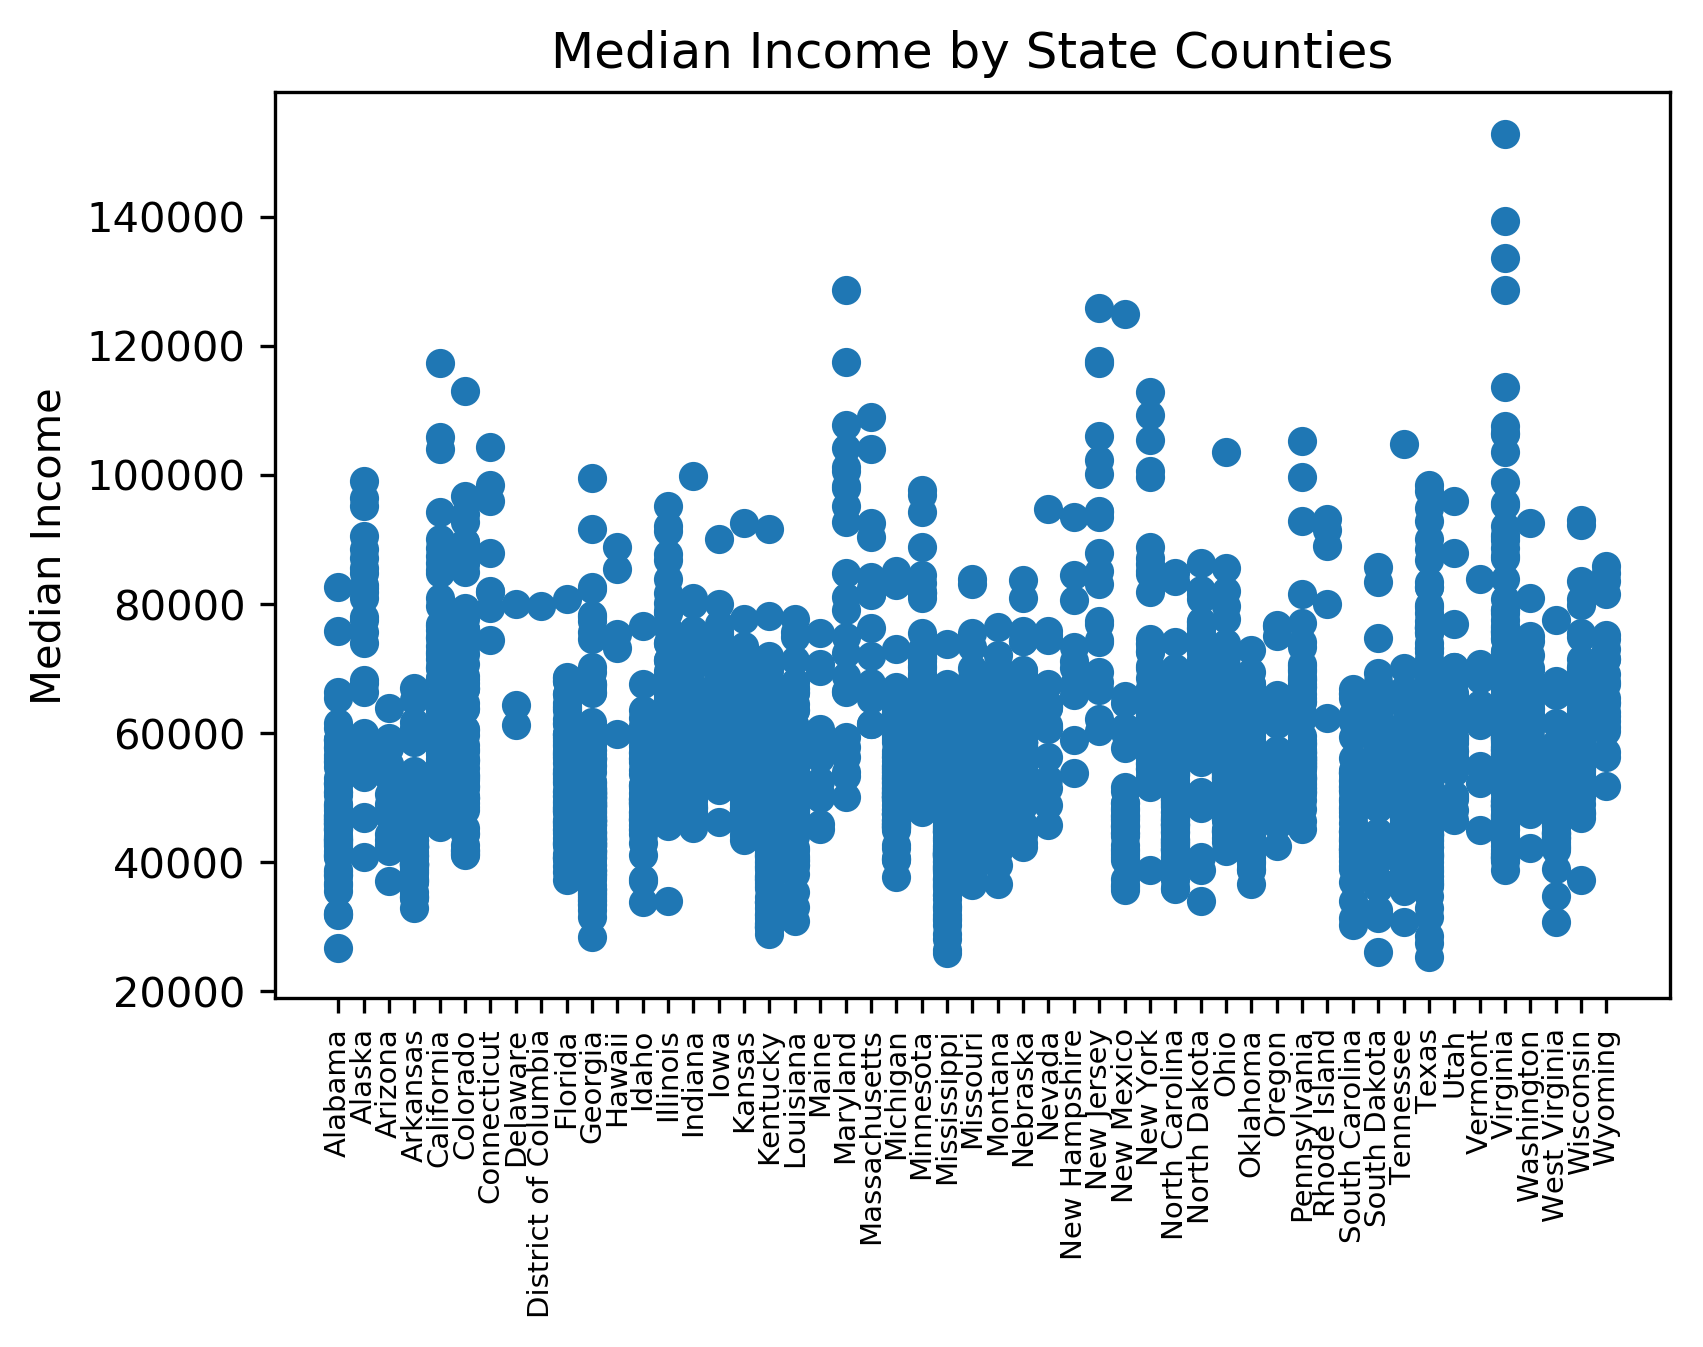

In [6]:
# sort by state and save a csv
df_medianincome_sort_state = df_medianincome_trim.sort_values(['State'])
df_medianincome2 = df_medianincome_sort_state
df_medianincome2.to_csv('list_of_state_and_counties_by_median_income.csv',header=1,index=False)

# plot the data
plt.figure(dpi=300)
plt.xticks( fontsize=7, rotation=90)
plt.scatter(df_medianincome2['State'], df_medianincome2['MedianIncome'])
plt.title('Median Income by State Counties')
plt.ylabel('Median Income')
plt.savefig('median_income_states.png', bbox_inches = 'tight')
plt.show()

In [8]:
# declare variable and load csvs
state_list = []
df_income = pd.read_csv('list_of_state_and_counties_by_median_income.csv')
df_fips_county = pd.read_csv('data/FipsCountyCodes.csv')

# convert state name to abbbreviation
[[state_list.append(us_state_abbrev[key]) for key in us_state_abbrev if key == state] for state in df_income['State']]
df_income['State'] = pd.Series(state_list)
df2_sort = df_income.sort_values(['State', 'County'])
df2_sort["Name"] = df2_sort["State"].map(str) + ', ' + df2_sort["County"]
results = pd.merge(df2_sort,
                  df_fips_county,
                  on='Name',
                  how='left')
results = results.dropna()

# plot settings
fips = results['FIPScounty'].tolist()
values = results['MedianIncome'].tolist()
colorscale = ['#ffffff', '#ffffff', '#ffffff', '#f3e9fc', '#e6d2f9', '#dabcf6', '#cda5f3', '#c18ff0', '#b478ed', '#a862ea', '#9c4be7', '#8f35e3', '#831fe0', '#761cca', '#6918b4', '#5c159d', '#4e1287']
endpts = list(np.linspace(1, 100000, len(colorscale) - 1))

# plot results
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=3, title='Median Income by County',
    legend_title='in US Dollars'
)
py.plotly.tools.set_credentials_file(username=_config.username_plotly, api_key=_config.api_key_plotly)
py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gilbertduenas/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


https://plot.ly/~gilbertduenas/0/median-income-by-county/#/